In [117]:
import os
import sklearn
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

tf.random.set_seed(42)

filename1 = 'D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/SensorCallbi/LABS_v2/Data/210903_70ms_3ea_Data.csv'
filename2 = 'D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/SensorCallbi/LABS_v2/Data/210903_70ms_3ea_Data_from_z40.csv'
SD = pd.read_csv(filename1).append(pd.read_csv(filename2))
SD=SD.iloc[:,:28]
SensorData = SD

In [118]:
SD

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx08,Sx09,...,Sx12,Sx13,Sx14,Sx15,Sx16,Sx17,r,theta,theta_enc,z
0,49.19,43.65,45.05,47.95,51.57,44.55,25.45,48.26,47.01,48.86,...,47.19,49.6,47.64,47.58,45.39,49.84,0.4,0,0.00,0
1,49.19,45.17,45.05,47.95,51.57,48.39,28.30,50.06,47.92,47.95,...,45.37,48.6,45.06,45.80,47.41,49.84,0.4,0,0.00,0
2,52.67,45.93,44.16,49.73,47.81,49.35,25.45,48.26,50.65,49.77,...,47.19,47.6,45.92,47.58,45.39,48.06,0.4,0,0.00,0
3,49.19,44.41,45.05,48.84,51.57,49.35,28.30,50.96,47.01,47.95,...,47.19,47.6,45.92,46.69,47.41,48.95,0.4,0,0.00,0
4,51.51,45.17,46.83,48.84,47.81,48.39,26.40,47.36,47.01,47.04,...,47.19,46.6,45.92,46.69,44.38,48.06,0.4,0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48376,51.51,47.45,45.05,41.72,50.63,50.31,28.30,48.26,47.92,48.86,...,47.19,50.6,47.64,48.47,45.39,48.06,1.6,350,352.71,100
48377,50.35,48.21,46.83,40.83,48.75,49.35,27.35,50.06,47.01,47.95,...,46.28,46.6,46.78,45.80,44.38,50.73,1.6,350,352.71,100
48378,49.19,48.97,45.94,44.39,46.87,48.39,30.20,48.26,47.92,47.04,...,48.10,45.6,48.50,49.36,47.41,49.84,1.6,350,352.71,100
48379,51.51,49.73,46.83,42.61,50.63,49.35,29.25,50.06,47.92,46.13,...,47.19,47.6,47.64,48.47,47.41,52.51,1.6,350,352.71,100


In [119]:
SD.describe()

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx08,Sx09,...,Sx12,Sx13,Sx14,Sx15,Sx16,Sx17,r,theta,theta_enc,z
count,76027.000000,76027.000000,76027.000000,76027.000000,76027.000000,76027.000000,76027.000000,76027.000000,76027.000000,76027.000000,...,76027.000000,76027.000000,76027.000000,76027.000000,76027.000000,76027.000000,76027.000000,76027.000000,76027.000000,76027.000000
mean,50.634221,46.107487,44.437254,48.798677,51.369406,47.913731,26.804731,48.734451,47.291521,48.588306,...,47.234670,46.869352,47.386356,46.442855,43.929142,50.285427,0.999987,174.996646,181.084112,49.999342
std,2.540823,1.879420,2.061734,1.925214,2.529280,2.778589,2.737502,2.260827,2.016625,1.955380,...,1.926617,2.247358,2.188792,2.093028,2.363662,2.231598,0.447209,103.884810,104.863948,31.622756
min,27.150000,30.730000,27.250000,34.600000,29.950000,25.350000,7.400000,28.460000,27.900000,30.660000,...,28.990000,30.600000,28.720000,29.780000,24.180000,32.040000,0.400000,0.000000,0.000000,0.000000
25%,49.190000,45.170000,43.270000,47.950000,50.630000,47.430000,25.450000,47.360000,46.100000,47.950000,...,46.280000,45.600000,46.780000,45.800000,43.370000,48.950000,0.600000,80.000000,90.880000,20.000000
50%,51.510000,45.930000,45.050000,48.840000,51.570000,48.390000,27.350000,49.160000,47.920000,48.860000,...,47.190000,46.600000,47.640000,46.690000,44.380000,50.730000,0.800000,180.000000,180.220000,50.000000
75%,51.510000,47.450000,45.940000,49.730000,52.510000,49.350000,28.300000,50.060000,48.830000,49.770000,...,48.100000,48.600000,48.500000,47.580000,45.390000,51.620000,1.200000,260.000000,273.470000,80.000000
max,58.470000,52.770000,50.390000,55.070000,60.030000,57.030000,36.850000,56.360000,54.290000,55.230000,...,53.560000,54.600000,54.520000,53.810000,51.450000,56.960000,1.600000,350.000000,359.960000,100.000000


In [120]:
import numpy as np
toRad = np.pi/180 
SD['cos']=np.cos(SD.theta_enc*toRad)
SD['sin']=np.sin(SD.theta_enc*toRad)

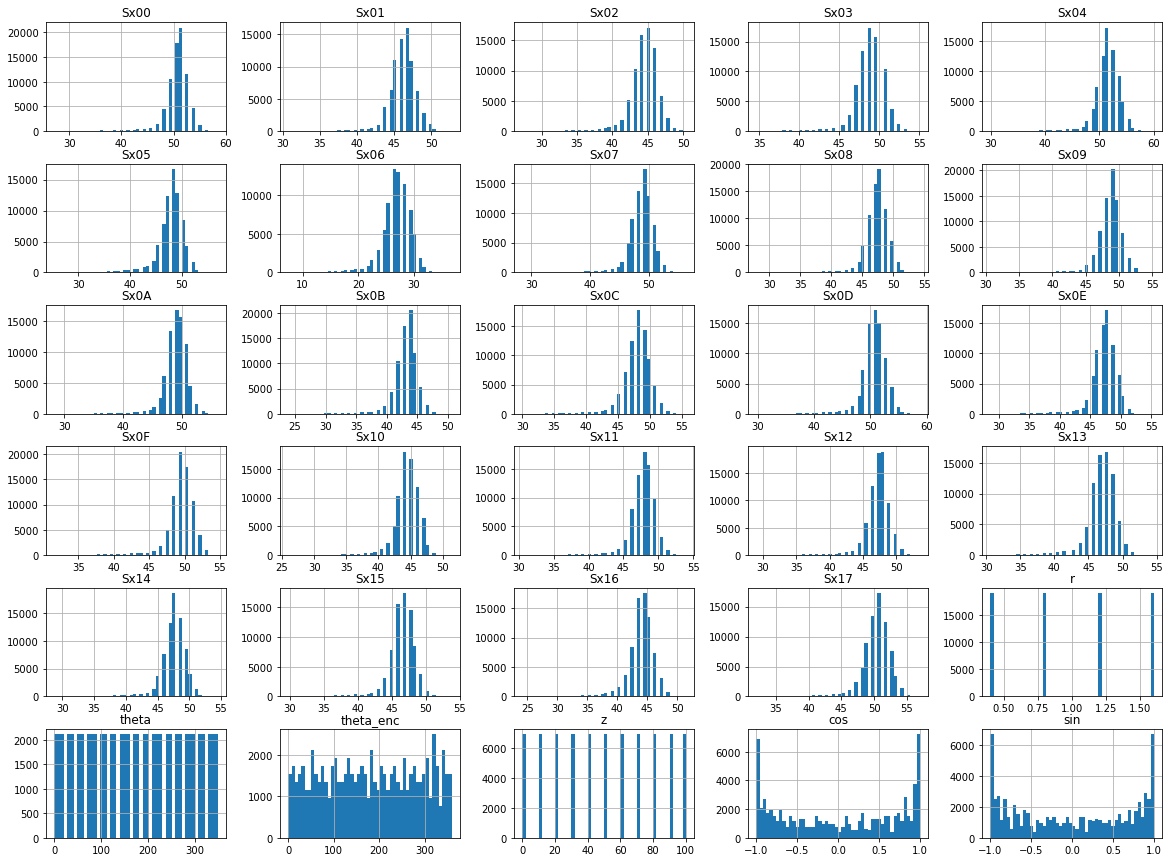

In [125]:
%matplotlib inline
import matplotlib.pyplot as plt
SD.hist(bins=30, figsize=(20,15))
plt.savefig('D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/SensorCallbi/LABS_v2/savefig/210903_70ms_3ea_hist.png')
plt.show()

In [126]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1,test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(SD, SensorData_extractZr["theta_enc"]):
    start_train_set = SensorData_extractZr.loc[train_index]
    start_test_set = SensorData_extractZr.loc[test_index]

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [ ]:
SensorData_extractZr["theta_enc"].value_counts()/len(start_test_set)

In [ ]:
SensorData_extractZr_copy = start_train_set.copy()

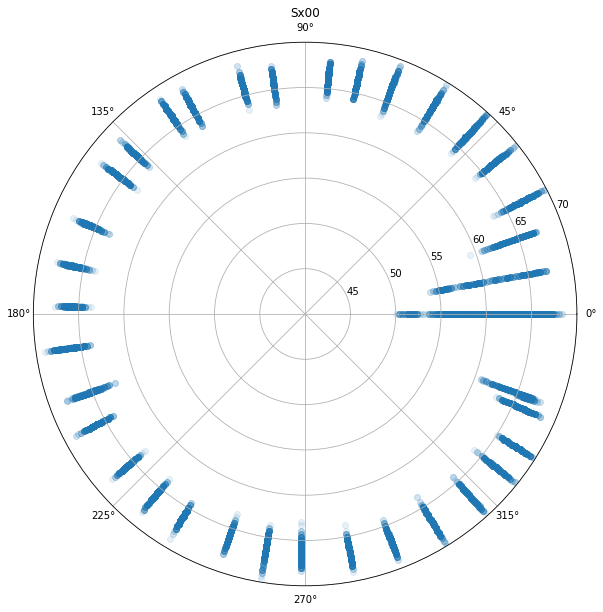

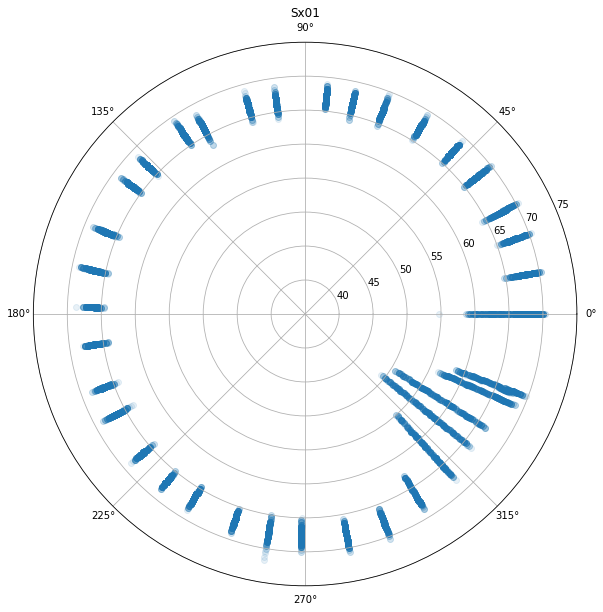

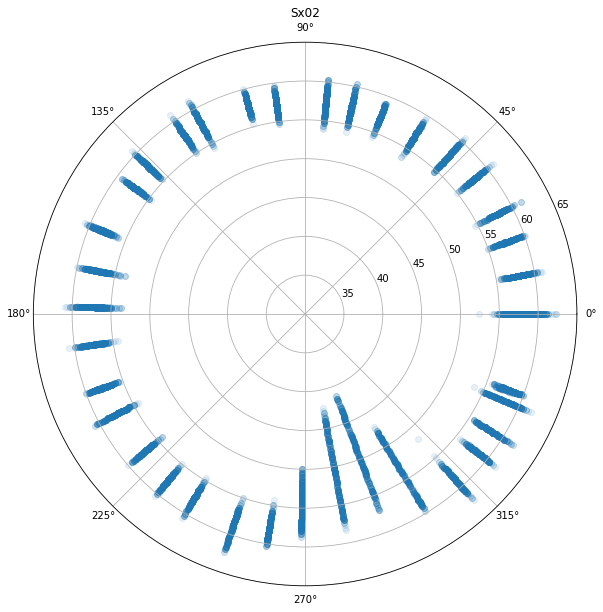

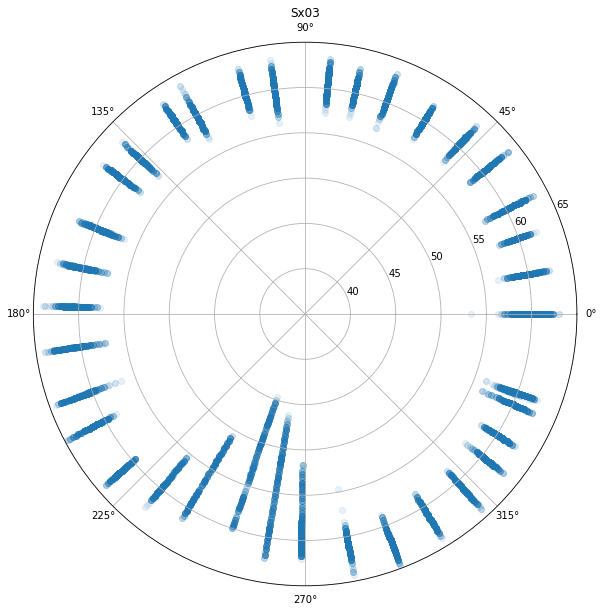

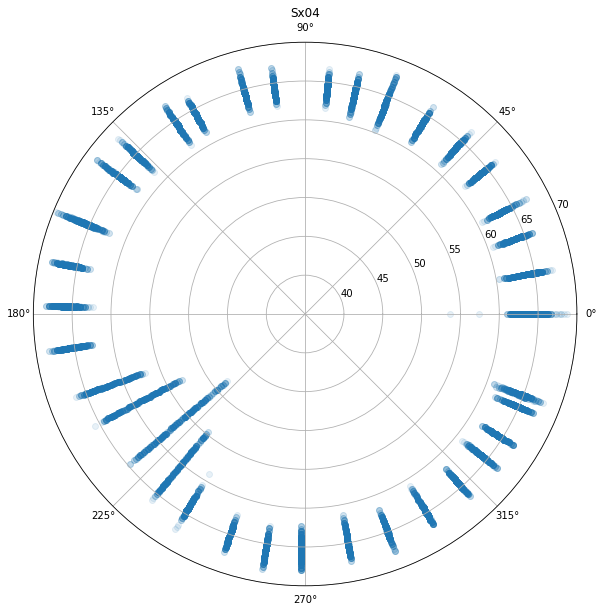

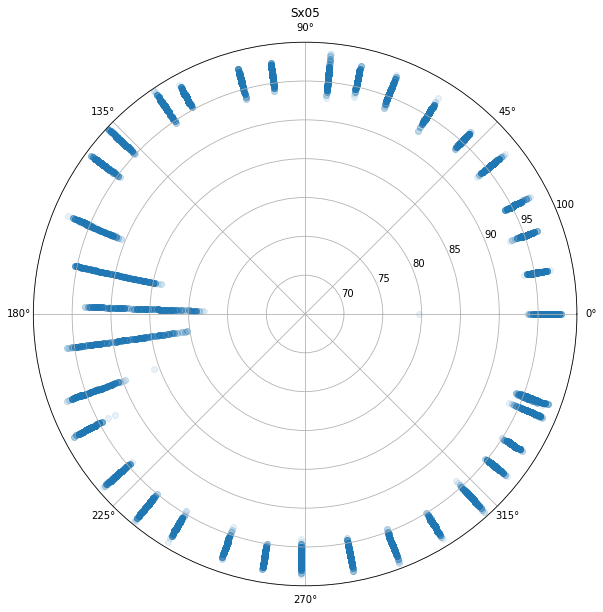

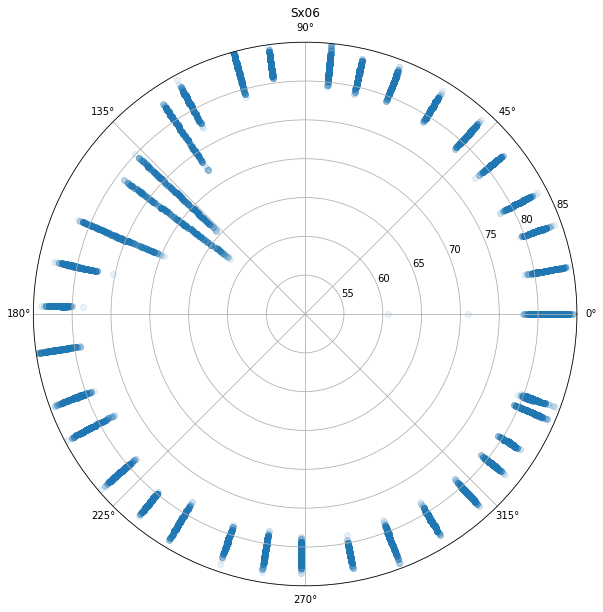

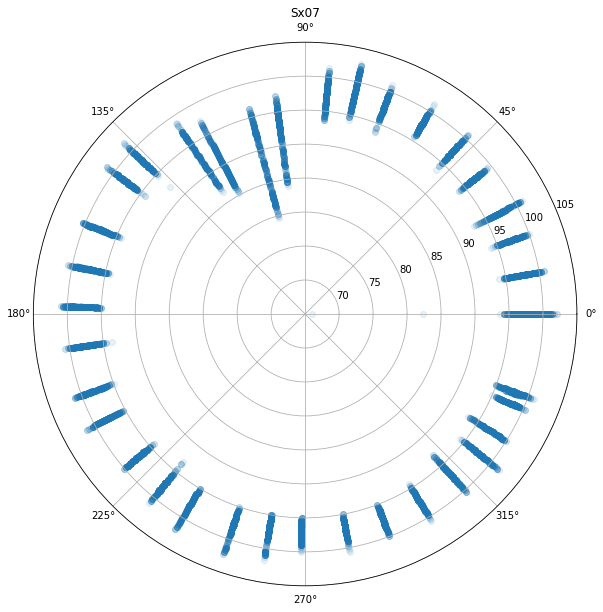

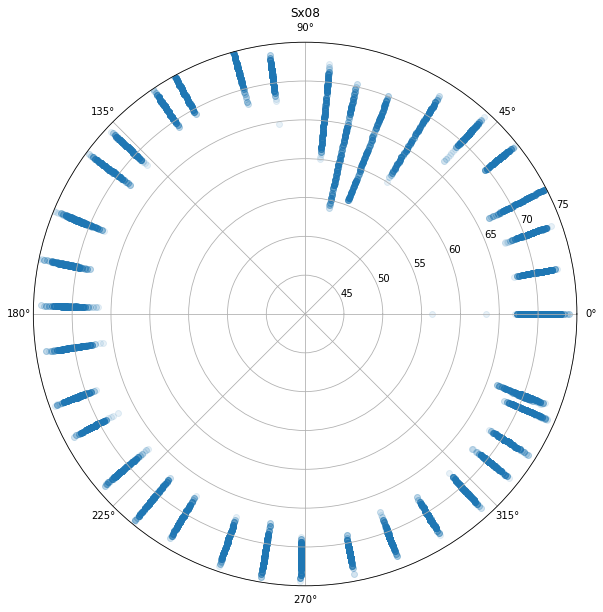

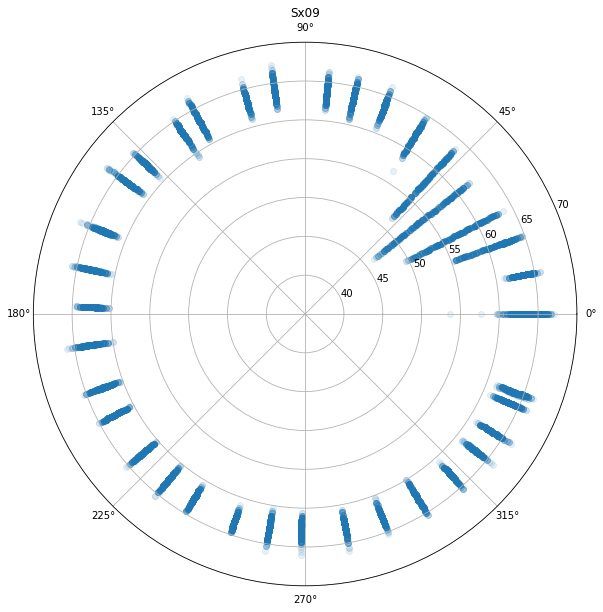

In [12]:
for i in range(0,10):
    plt.figure(figsize = (10,10))
    Sxarray=["Sx00","Sx01","Sx02","Sx03","Sx04","Sx05","Sx06","Sx07","Sx08","Sx09"]
    Sxrange=[[50,70],[45,75],[40,65],[45,65],[45,70],[75,100],[60,85],[75,105],[50,75],[45,70]]
    spider_theta = SensorData_extractZr["theta_enc"]*toRad
    spider_r = SensorData_extractZr[Sxarray[i]]
    ax = plt.subplot(polar=True)
    c = ax.scatter(spider_theta, spider_r, alpha=0.1)
    ax.set_rmin(Sxrange[i][0]-10)
    ax.set_rmax(Sxrange[i][1])    
    plt.title(Sxarray[i])
    plt.savefig('D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/SensorCallbi/LABS_v1/savefig/210805_70ms_Mean3ea_hist_spider_{0}.png'.format(Sxarray[i]))
    plt.show()

In [ ]:
SensorData_extractZr.plot(kind="scatter", x= "theta_enc",y= "Sx00",alpha = 0.1)

In [ ]:
for i in range(0,10):
    Sxarray=["Sx00","Sx01","Sx02","Sx03","Sx04","Sx05","Sx06","Sx07","Sx08","Sx09"]
    SensorData_extractZr.plot(kind="scatter", x= "r",y= Sxarray[i],alpha = 0.1)
    plt.savefig('D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/SensorCallbi/savefig/210805_70ms_Mean3ea_hist_scatter_r_{0}.png'.format(Sxarray[i]))

In [ ]:
sensor.plot(kind="scatter", x= "Sx00",y= "z",alpha = 0.1)
sensor.plot(kind="scatter", x= "Sx01",y= "z",alpha = 0.1)
sensor.plot(kind="scatter", x= "Sx02",y= "z",alpha = 0.1)
sensor.plot(kind="scatter", x= "Sx03",y= "z",alpha = 0.1)
sensor.plot(kind="scatter", x= "Sx04",y= "z",alpha = 0.1)
sensor.plot(kind="scatter", x= "Sx05",y= "z",alpha = 0.1)
sensor.plot(kind="scatter", x= "Sx06",y= "z",alpha = 0.1)
sensor.plot(kind="scatter", x= "Sx07",y= "z",alpha = 0.1)
sensor.plot(kind="scatter", x= "Sx08",y= "z",alpha = 0.1)
sensor.plot(kind="scatter", x= "Sx09",y= "z",alpha = 0.1)

In [ ]:
corr_matrix = sensor_copy.corr()

In [ ]:
corr_matrix["theta_enc"].sort_values(ascending=False)

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["r","theta_enc","cos","sin","Sx00","Sx01","Sx02","Sx03","Sx04","Sx05","Sx06","Sx07","Sx08","Sx09"]
scatter_matrix(SensorData_extractZr[attributes],figsize=(40,40))
plt.savefig('D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/SensorCallbi/savefig/210805_70ms_Mean3ea_hist_scatter2.png')